In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. 데이터 로드 및 전처리
# DSA 데이터 가져오기

df = pd.read_csv('DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df.shape

(9120, 272)

In [4]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [5]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

Text(0, 0.5, 'Count')

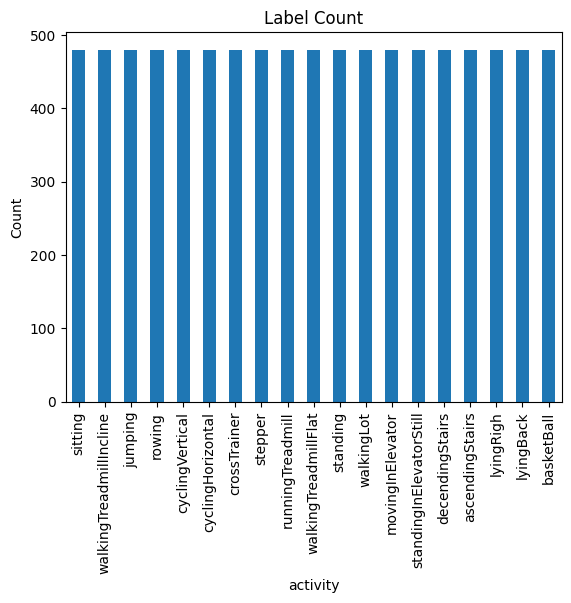

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('activity')
plt.ylabel('Count')

In [7]:
# 결측치 홗인

df.isnull().values.any()

False

In [8]:
df['activity'] = df['activity'].replace(['lyingBack', 'lyingRigh'], 'lying')

In [9]:
df['activity'].value_counts()

activity
lying                      960
sitting                    480
runningTreadmill           480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
walkingTreadmillIncline    480
standing                   480
walkingTreadmillFlat       480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
basketBall                 480
Name: count, dtype: int64

In [10]:
# 3. 정상(normal)과 비정상(abnormal) 데이터 필터링
normal_data = df[df['activity'] == 'lying']
abnormal_data = df[df['activity'] == 'standing']

In [11]:
# train/test 분할: normal 데이터의 절반을 train으로 사용
train_data = normal_data.sample(frac=0.5, random_state=42)  # 50%를 훈련용으로 사용
remaining_normal_data = normal_data.drop(train_data.index)  # 남은 데이터

# test 데이터 생성: remaining_normal_data와 abnormal_data를 섞기
test_data = pd.concat([remaining_normal_data, abnormal_data])
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)  # 데이터 섞기

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data.drop(['activity', 'people'], axis=1))
X_test_scaled = scaler.transform(test_data.drop(['activity', 'people'], axis=1))

def add_noise(data, noise_factor=0.5):
    noisy_data = data.copy()
    for column in noisy_data.columns:
        noisy_data[column] += noise_factor * np.random.normal(loc=0.0, scale=1.0, size=noisy_data[column].shape)
    return noisy_data

# 원본 데이터 복사
train_data_no_noise = train_data.copy()
test_data_no_noise = test_data.copy()

# 노이즈를 추가한 데이터 생성
train_data_with_noise = train_data_no_noise.copy()
train_data_with_noise.iloc[:, :-2] = add_noise(train_data_with_noise.iloc[:, :-2], noise_factor=0.5)

test_data_with_noise = test_data_no_noise.copy()
test_data_with_noise.iloc[:, :-2] = add_noise(test_data_with_noise.iloc[:, :-2], noise_factor=0.5)

# 훈련 및 테스트 세트 정의
X_train_no_noise = train_data_no_noise.drop(['activity','people'], axis=1).values
y_train_no_noise = train_data_no_noise['activity'].values

X_train_with_noise = train_data_with_noise.drop(['activity','people'], axis=1).values
y_train_with_noise = train_data_with_noise['activity'].values

X_test_no_noise = test_data_no_noise.drop(['activity','people'], axis=1).values
y_test_no_noise = test_data_no_noise['activity'].values

X_test_with_noise = test_data_with_noise.drop(['activity','people'], axis=1).values
y_test_with_noise = test_data_with_noise['activity'].values

# 결과 확인
print("X_train_no_noise shape:", X_train_no_noise.shape)
print("y_train_no_noise shape:", y_train_no_noise.shape)
print("X_train_with_noise shape:", X_train_with_noise.shape)
print("y_train_with_noise shape:", y_train_with_noise.shape)
print("X_test_no_noise shape:", X_test_no_noise.shape)
print("y_test_no_noise shape:", y_test_no_noise.shape)
print("X_test_with_noise shape:", X_test_with_noise.shape)
print("y_test_with_noise shape:", y_test_with_noise.shape)

X_train_no_noise shape: (480, 270)
y_train_no_noise shape: (480,)
X_train_with_noise shape: (480, 270)
y_train_with_noise shape: (480,)
X_test_no_noise shape: (960, 270)
y_test_no_noise shape: (960,)
X_test_with_noise shape: (960, 270)
y_test_with_noise shape: (960,)


In [20]:
input_dim = X_train_scaled.shape[1]
encoding_dim = 32  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='linear')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='linear')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 훈련
history = autoencoder.fit(
    X_train_with_noise, X_train_with_noise,  # 노이즈 있는 데이터를 훈련용으로 사용
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_train_no_noise, X_train_no_noise),  # 벨리데이션 데이터로 노이즈 없는 데이터 사용
    verbose=1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0142 - val_loss: 5.4830
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 5.4970 - val_loss: 4.7543
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 4.8004 - val_loss: 3.2401
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 3.0331 - val_loss: 1.8599
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 1.9278 - val_loss: 1.4310
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 1.6031 - val_loss: 1.3342
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 1.7111 - val_loss: 1.2997
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 1.6080 - val_loss: 1.2738
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 1.7062 - val_loss: 1.2462
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 1.4689 - val_loss: 1.2134
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 1.4896 - val_loss: 1.1734
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step -

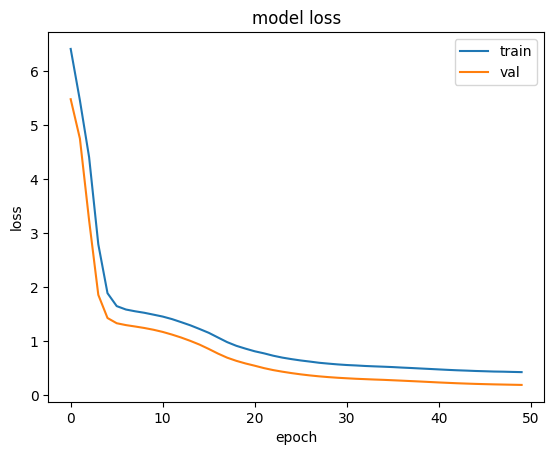

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right');

In [22]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test_with_noise)
mse = np.mean(np.power(X_test_with_noise - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test_with_noise})
error_df.describe()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


,reconstruction_error
count,960.000000
mean,2.170863
std,1.737789
min,0.264243
25%,0.413105
50%,2.909322
75%,3.899558
max,4.772739


In [23]:
error_df.head()

,reconstruction_error,true_class
0,3.778482,standing
1,0.389199,lying
2,0.575672,lying
3,3.745751,standing
4,4.100014,standing


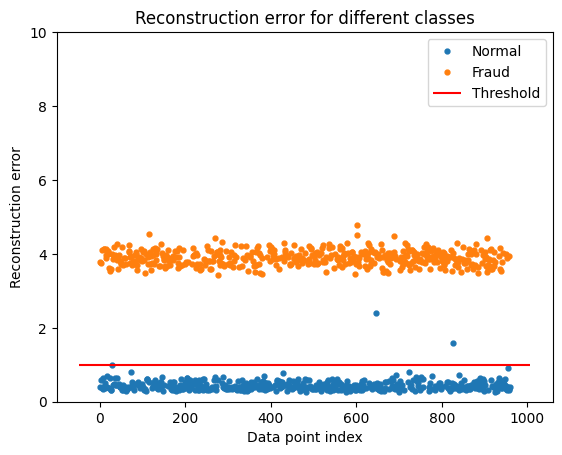

In [24]:
# 임계값 설정 (예: 평균 재구성 오류의 1.5배)
threshold = 1

# 오류 시각화
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    label = "Normal" if name.startswith("lying") else "Fraud"
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='', label=label)

# 임계값 수평선 추가
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
# Y 축 범위 조정
ax.set_ylim(0, 10)
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

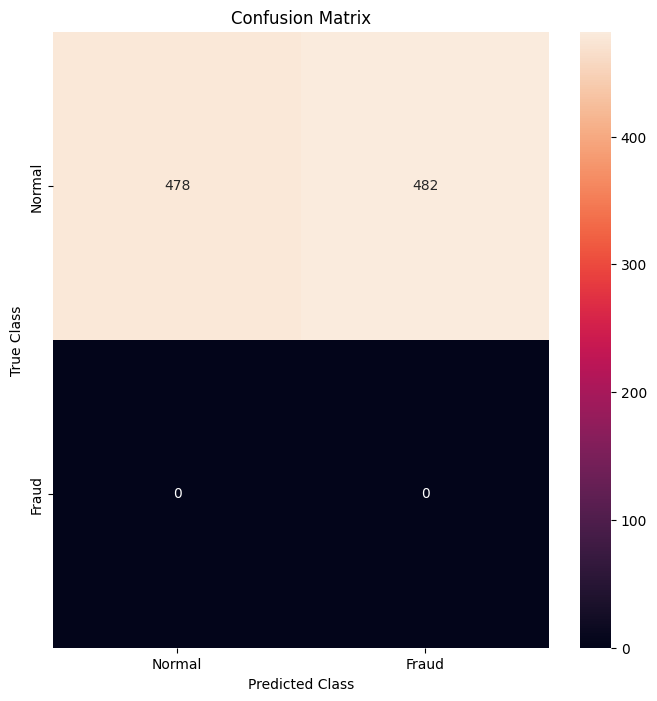

              precision    recall  f1-score   support

           0       1.00      0.50      0.66       960
           1       0.00      0.00      0.00         0

    accuracy                           0.50       960
   macro avg       0.50      0.25      0.33       960
weighted avg       1.00      0.50      0.66       960



/opt/anaconda3/envs/school/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/school/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/school/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 수행: 재구성 오류가 임계값을 초과하면 1, 아니면 0
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

# 혼동 행렬 생성
conf_matrix = confusion_matrix(error_df.true_class.apply(lambda x: 1 if x == 'jumping' else 0), y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 8))
LABELS = ["Normal", "Fraud"]  # 레이블 정의
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# 분류 보고서 출력
print(classification_report(error_df.true_class.apply(lambda x: 1 if x == 'jumping' else 0), y_pred))
